# lung_cancer_analysis

A simple analysis on what gender responds the most to peer pressure and start smoking and by how much , based on this survey

In [2]:
import pandas as pd

df=pd.read_csv('survey lung cancer.csv')
df.head(1)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES


# loading the data and pre processing it

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df.columns = df.columns.str.strip().str.replace(' ', '_').str.upper()
print(df.columns.tolist())
print("\ndataframe info")
df.info()
print("\nmissing values")
df.isnull().sum() # nan values

['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER']

dataframe info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC_DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL_CONSUMING      3

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

# EDA on Gender, Peer Pressure, and Smoking factors in particular

Let's take a look at the counts and proportions of each category for these key factors

Distribution of GENDER
GENDER
M    162
F    147
Name: count, dtype: int64

Proportions:
GENDER
M    0.52
F    0.48
Name: proportion, dtype: float64


/tmp/ipykernel_18598/62327404.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GENDER', data=df, palette='viridis')


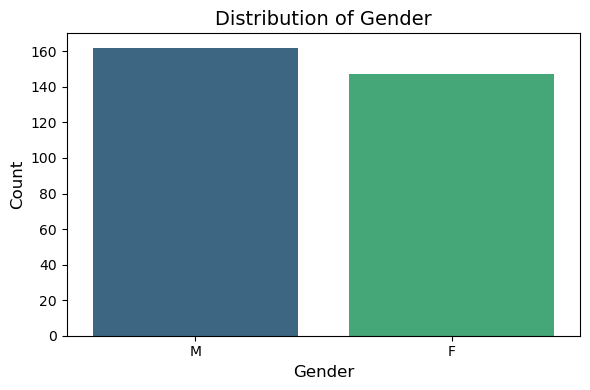


Distribution of PEER_PRESSURE (1=Yes, 2=No)
PEER_PRESSURE
2    155
1    154
Name: count, dtype: int64

Proportions:
PEER_PRESSURE
2    0.5
1    0.5
Name: proportion, dtype: float64


/tmp/ipykernel_18598/62327404.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PEER_PRESSURE', data=df, palette='cividis')


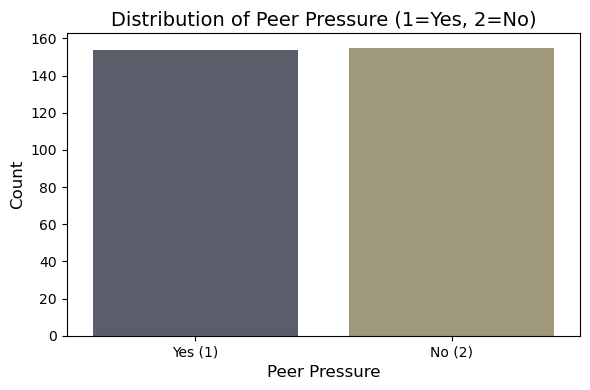


Distribution of SMOKING (1=Yes, 2=No)
SMOKING
2    174
1    135
Name: count, dtype: int64

Proportions:
SMOKING
2    0.56
1    0.44
Name: proportion, dtype: float64


/tmp/ipykernel_18598/62327404.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SMOKING', data=df, palette='plasma')


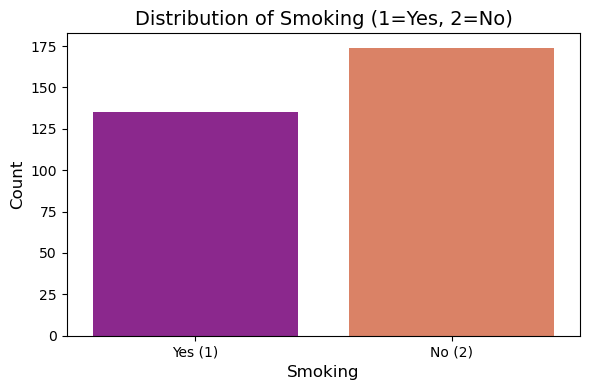

In [5]:
# Distribution of GENDER
print("Distribution of GENDER")
print(df['GENDER'].value_counts())
print("\nProportions:")
print(df['GENDER'].value_counts(normalize=True).round(2))
plt.figure(figsize=(6, 4))
sns.countplot(x='GENDER', data=df, palette='viridis')
plt.title('Distribution of Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

# Distribution of PEER_PRESSURE
print("\nDistribution of PEER_PRESSURE (1=Yes, 2=No)")
print(df['PEER_PRESSURE'].value_counts())
print("\nProportions:")
print(df['PEER_PRESSURE'].value_counts(normalize=True).round(2))

plt.figure(figsize=(6, 4))
sns.countplot(x='PEER_PRESSURE', data=df, palette='cividis')
plt.title('Distribution of Peer Pressure (1=Yes, 2=No)', fontsize=14)
plt.xlabel('Peer Pressure', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Yes (1)', 'No (2)'])
plt.tight_layout()
plt.show()

# Distribution of SMOKING
print("\nDistribution of SMOKING (1=Yes, 2=No)")
print(df['SMOKING'].value_counts())
print("\nProportions:")
print(df['SMOKING'].value_counts(normalize=True).round(2))

plt.figure(figsize=(6, 4))
sns.countplot(x='SMOKING', data=df, palette='plasma')
plt.title('Distribution of Smoking (1=Yes, 2=No)', fontsize=14)
plt.xlabel('Smoking', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Yes (1)', 'No (2)'])
plt.tight_layout()
plt.show()

# Relationship Between Gender, Peer Pressure, and Smoking

In [6]:
# Filter for individuals who reported experiencing peer pressure
df_peer_pressure = df[df['PEER_PRESSURE'] == 1].copy()

print("Individuals reporting peer pressure (breakdown by gender)")
print(df_peer_pressure['GENDER'].value_counts())
print("\nProportions:")
print(df_peer_pressure['GENDER'].value_counts(normalize=True).round(2))

# analyzing smoking habits within the peer pressure group, by gender
smoking_by_gender_peer_pressure = df_peer_pressure.groupby('GENDER')['SMOKING'].value_counts(normalize=True).unstack().fillna(0).round(3)
print("\nSmoking Proportions (Yes/No) within peer pressure group, by gender ---")
smoking_by_gender_peer_pressure.columns = ['Smoking_Yes_1', 'Smoking_No_2']
print(smoking_by_gender_peer_pressure)
# Calculating the percentage of each gender who smoke due to peer pressure
# inclduing only who smoke in here
percentage_smoking_peer_pressure = smoking_by_gender_peer_pressure['Smoking_Yes_1'] * 100
print("\nPercentage of Each Gender Smoking (Among Those with Peer Pressure)")
print(percentage_smoking_peer_pressure)

Individuals reporting peer pressure (breakdown by gender)
GENDER
M    102
F     52
Name: count, dtype: int64

Proportions:
GENDER
M    0.66
F    0.34
Name: proportion, dtype: float64

Smoking Proportions (Yes/No) within peer pressure group, by gender ---
        Smoking_Yes_1  Smoking_No_2
GENDER                             
F               0.500         0.500
M               0.373         0.627

Percentage of Each Gender Smoking (Among Those with Peer Pressure)
GENDER
F    50.0
M    37.3
Name: Smoking_Yes_1, dtype: float64


# visualizing the relationship

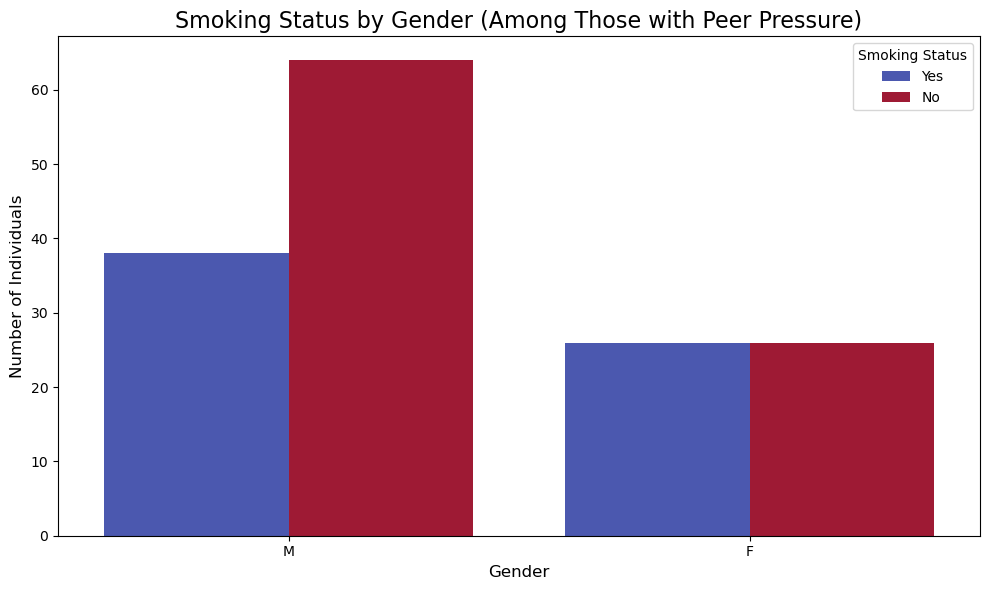

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_peer_pressure, x='GENDER', hue='SMOKING', palette='coolwarm')
plt.title('Smoking Status by Gender (Among Those with Peer Pressure)', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Smoking Status', labels=['Yes', 'No']) # Custom labels for legend
plt.tight_layout()
plt.show()

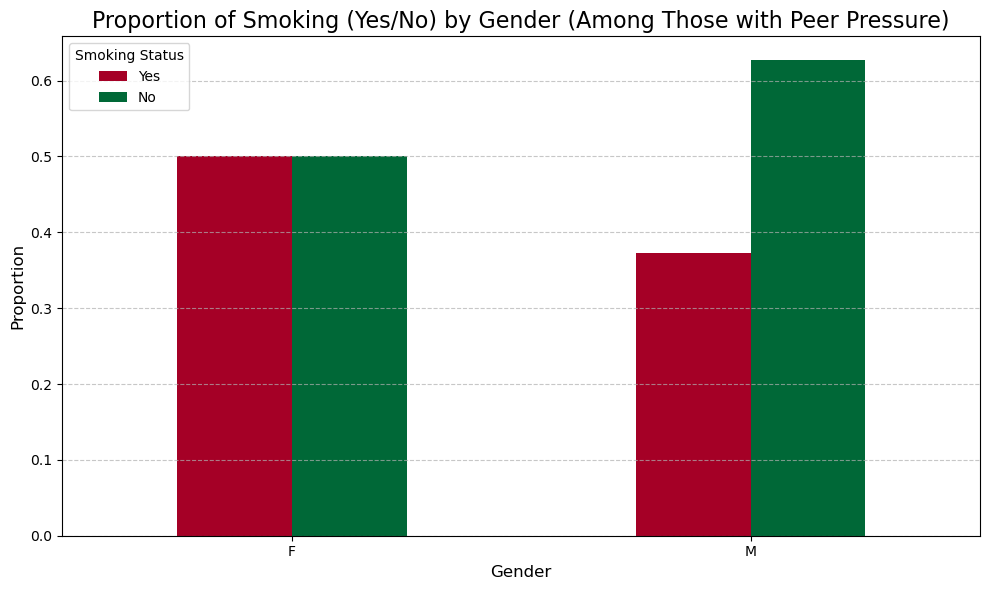

In [8]:
smoking_by_gender_peer_pressure.plot(kind='bar', figsize=(10, 6), colormap='RdYlGn')
plt.title('Proportion of Smoking (Yes/No) by Gender (Among Those with Peer Pressure)', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Smoking Status', labels=['Yes', 'No'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Based on this results, 
Percentage of Each Gender Smoking (Among Those with Peer Pressure)
GENDER
F    50.0
M    37.3
we can conclude that female's percentage of those who smoke is comparitively higher than on the male side.
50.0-37.3= 12.7 %

# so we can conclude females respond to peer pressure and start smoking more than males by 12.7 % 